In [25]:
import pandas as pd

In [26]:
df = pd.read_csv('../data/smart_grid_dataset.csv')
df.head(3)

,Timestamp,Voltage (V),Current (A),Power Consumption (kW),Reactive Power (kVAR),Power Factor,Solar Power (kW),Wind Power (kW),Grid Supply (kW),Voltage Fluctuation (%),Overload Condition,Transformer Fault,Temperature (°C),Humidity (%),Electricity Price (USD/kWh),Predicted Load (kW)
0,2024-01-01 00:00:00,232.483571,5.124673,1.191402,0.399029,0.907766,46.614845,26.399566,0.0,1.055937,0,0,17.842767,64.523353,0.416156,1.233158
1,2024-01-01 00:15:00,229.308678,22.213519,5.093753,1.248030,0.831813,6.907170,18.555011,0.0,-3.910902,1,0,18.753698,49.671940,0.492334,5.247824
2,2024-01-01 00:30:00,233.238443,46.132217,10.759806,2.790464,0.999005,15.477640,12.905025,0.0,-0.197551,0,0,16.719325,48.472769,0.427785,10.580278


In [27]:
df.describe()

,Voltage (V),Current (A),Power Consumption (kW),Reactive Power (kVAR),Power Factor,Solar Power (kW),Wind Power (kW),Grid Supply (kW),Voltage Fluctuation (%),Overload Condition,Transformer Fault,Temperature (°C),Humidity (%),Electricity Price (USD/kWh),Predicted Load (kW)
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,229.997896,27.482627,6.320811,1.584137,0.899997,25.075357,15.008312,0.047198,-0.002723,0.099120,0.029200,25.019338,50.092434,0.299095,6.320693
std,5.000849,12.984307,2.990096,0.964876,0.057740,14.434644,8.663070,0.460281,2.884219,0.298826,0.168368,8.657092,17.263387,0.115495,2.997199
min,207.671981,5.001239,1.089178,0.113665,0.800001,0.000115,0.000067,0.000000,-4.999913,0.000000,0.000000,10.000016,20.000423,0.100002,1.043487
25%,226.606874,16.144764,3.706998,0.805235,0.849930,12.597064,7.495573,0.000000,-2.506506,0.000000,0.000000,17.483315,35.271140,0.198925,3.711469
50%,230.008697,27.580058,6.340475,1.386541,0.900119,25.031922,15.035654,0.000000,-0.009397,0.000000,0.000000,25.052471,49.998822,0.298936,6.328723
75%,233.385302,38.778588,8.914134,2.209433,0.949748,37.527215,22.528948,0.000000,2.493917,0.000000,0.000000,32.541626,65.017934,0.398642,8.910125
max,252.395421,49.999642,12.103199,4.684119,0.999997,49.998963,29.997815,10.766046,4.999946,1.000000,1.000000,39.999949,79.997923,0.499996,12.483253


### No NA values



In [28]:
df.isna().sum()

Timestamp                      0
Voltage (V)                    0
Current (A)                    0
Power Consumption (kW)         0
Reactive Power (kVAR)          0
Power Factor                   0
Solar Power (kW)               0
Wind Power (kW)                0
Grid Supply (kW)               0
Voltage Fluctuation (%)        0
Overload Condition             0
Transformer Fault              0
Temperature (°C)               0
Humidity (%)                   0
Electricity Price (USD/kWh)    0
Predicted Load (kW)            0
dtype: int64

In [29]:
#df['Timestamp'] = pd.to_datetime(df['Timestamp']).dt.date


### Ordinal: Overload condition and Transformer Fault
#### Since data is being aggregated, will use mean for continous features and threshold based mean ordinal var

#### Will merge the final dataframe

In [30]:
df.head(3)

,Timestamp,Voltage (V),Current (A),Power Consumption (kW),Reactive Power (kVAR),Power Factor,Solar Power (kW),Wind Power (kW),Grid Supply (kW),Voltage Fluctuation (%),Overload Condition,Transformer Fault,Temperature (°C),Humidity (%),Electricity Price (USD/kWh),Predicted Load (kW)
0,2024-01-01 00:00:00,232.483571,5.124673,1.191402,0.399029,0.907766,46.614845,26.399566,0.0,1.055937,0,0,17.842767,64.523353,0.416156,1.233158
1,2024-01-01 00:15:00,229.308678,22.213519,5.093753,1.248030,0.831813,6.907170,18.555011,0.0,-3.910902,1,0,18.753698,49.671940,0.492334,5.247824
2,2024-01-01 00:30:00,233.238443,46.132217,10.759806,2.790464,0.999005,15.477640,12.905025,0.0,-0.197551,0,0,16.719325,48.472769,0.427785,10.580278


In [31]:
df.tail(3)

,Timestamp,Voltage (V),Current (A),Power Consumption (kW),Reactive Power (kVAR),Power Factor,Solar Power (kW),Wind Power (kW),Grid Supply (kW),Voltage Fluctuation (%),Overload Condition,Transformer Fault,Temperature (°C),Humidity (%),Electricity Price (USD/kWh),Predicted Load (kW)
49997,2025-06-04 19:15:00,232.500424,43.166952,10.036335,1.631748,0.913899,37.235774,12.475871,0.0,1.810338,1,0,12.606985,62.469951,0.215314,9.947611
49998,2025-06-04 19:30:00,231.326077,46.254150,10.699791,1.712672,0.948393,22.098785,1.512796,0.0,1.500918,0,0,26.773676,58.100487,0.147162,10.886454
49999,2025-06-04 19:45:00,237.579055,17.904864,4.253821,1.050729,0.939617,7.220105,24.808317,0.0,-1.584342,0,0,15.083737,43.051294,0.360774,4.361657


In [32]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])  # ensure it's datetime
df = df.set_index('Timestamp') 

discrete_cols = ['Overload Condition', 'Transformer Fault']
continous_cols = [col for col in df.columns if col not in discrete_cols and col !='Timestamp']
continous_cols

['Voltage (V)',
 'Current (A)',
 'Power Consumption (kW)',
 'Reactive Power (kVAR)',
 'Power Factor',
 'Solar Power (kW)',
 'Wind Power (kW)',
 'Grid Supply (kW)',
 'Voltage Fluctuation (%)',
 'Temperature (°C)',
 'Humidity (%)',
 'Electricity Price (USD/kWh)',
 'Predicted Load (kW)']

In [33]:
df.index

DatetimeIndex(['2024-01-01 00:00:00', '2024-01-01 00:15:00',
               '2024-01-01 00:30:00', '2024-01-01 00:45:00',
               '2024-01-01 01:00:00', '2024-01-01 01:15:00',
               '2024-01-01 01:30:00', '2024-01-01 01:45:00',
               '2024-01-01 02:00:00', '2024-01-01 02:15:00',
               ...
               '2025-06-04 17:30:00', '2025-06-04 17:45:00',
               '2025-06-04 18:00:00', '2025-06-04 18:15:00',
               '2025-06-04 18:30:00', '2025-06-04 18:45:00',
               '2025-06-04 19:00:00', '2025-06-04 19:15:00',
               '2025-06-04 19:30:00', '2025-06-04 19:45:00'],
              dtype='datetime64[ns]', name='Timestamp', length=50000, freq=None)

### Taking mthreshold based means
#### If 60% times in a day, power was overload then it is 1 (Overloaded for whole day)
#### If 10% times in a day, transformer was found faulty then it is marked faulty for that day.

In [34]:
# Resample continuous with mean
df_cont = df[continous_cols ].resample('D').mean()

# Resample discrete with mode (most frequent value of the day)
thresholds = {
    'Overload Condition': 0.2,
    'Transformer Fault': 0.1,
}
df_disc_mean = df[thresholds.keys()].resample('D').mean()

df_disc = pd.DataFrame({
    col: (df_disc_mean[col] > thresholds[col]).astype(int)
    for col in thresholds
})
# Merge back
df_daily = df_cont.merge(df_disc, left_index=True, right_index=True)

In [35]:
df_daily.tail(3)

,Voltage (V),Current (A),Power Consumption (kW),Reactive Power (kVAR),Power Factor,Solar Power (kW),Wind Power (kW),Grid Supply (kW),Voltage Fluctuation (%),Temperature (°C),Humidity (%),Electricity Price (USD/kWh),Predicted Load (kW),Overload Condition,Transformer Fault
Timestamp,,,,,,,,,,,,,,,
2025-06-02,229.421422,26.679700,6.122319,1.566531,0.900706,24.722421,16.057297,0.068809,-0.240128,24.733840,47.746748,0.301807,6.091351,0,0
2025-06-03,230.035298,27.236029,6.261330,1.580401,0.903957,24.137611,15.589334,0.007507,0.191340,24.754585,47.403113,0.320828,6.266547,0,0
2025-06-04,230.726101,28.221753,6.512869,1.602481,0.901393,26.763867,14.991984,0.023167,-0.110050,24.124967,49.540634,0.308253,6.528751,0,0


### We shall keep some date in seperate which is used to be for inference time


In [36]:
df_inference = df_daily.iloc[-10:]
df_inference.head(10)

,Voltage (V),Current (A),Power Consumption (kW),Reactive Power (kVAR),Power Factor,Solar Power (kW),Wind Power (kW),Grid Supply (kW),Voltage Fluctuation (%),Temperature (°C),Humidity (%),Electricity Price (USD/kWh),Predicted Load (kW),Overload Condition,Transformer Fault
Timestamp,,,,,,,,,,,,,,,
2025-05-26,230.123679,26.533685,6.112369,1.552541,0.898765,25.205411,14.641372,0.048538,0.193632,24.879234,50.752091,0.298928,6.086054,0,0
2025-05-27,230.239933,27.766174,6.388910,1.613326,0.893845,25.686605,13.977853,0.019597,0.189405,23.675152,52.512171,0.299877,6.394222,0,0
2025-05-28,230.405355,27.938716,6.443399,1.623933,0.905036,24.512328,15.704709,0.086352,0.006625,24.632369,53.585914,0.290330,6.450058,0,0
2025-05-29,230.195671,30.271678,6.963407,1.729545,0.909440,26.801054,14.023128,0.054273,-0.074129,26.081265,48.880017,0.301657,6.948483,0,0
2025-05-30,230.165617,25.991077,5.986217,1.546364,0.903701,24.506380,13.863530,0.000000,0.182551,25.051086,49.851539,0.294365,5.991779,0,0
2025-05-31,230.268010,28.531695,6.575676,1.851762,0.900120,28.631335,14.334395,0.000128,0.324529,25.302104,51.823439,0.288650,6.536226,0,0
2025-06-01,229.903169,27.368065,6.285922,1.546544,0.900102,25.105687,14.230707,0.049989,-0.097160,25.050227,48.620928,0.303376,6.289963,0,0
2025-06-02,229.421422,26.679700,6.122319,1.566531,0.900706,24.722421,16.057297,0.068809,-0.240128,24.733840,47.746748,0.301807,6.091351,0,0
2025-06-03,230.035298,27.236029,6.261330,1.580401,0.903957,24.137611,15.589334,0.007507,0.191340,24.754585,47.403113,0.320828,6.266547,0,0


In [37]:
# Dropping last n rows using drop
df_actual = df_daily.drop(df_daily.tail(8).index)
df_actual.tail(3)

,Voltage (V),Current (A),Power Consumption (kW),Reactive Power (kVAR),Power Factor,Solar Power (kW),Wind Power (kW),Grid Supply (kW),Voltage Fluctuation (%),Temperature (°C),Humidity (%),Electricity Price (USD/kWh),Predicted Load (kW),Overload Condition,Transformer Fault
Timestamp,,,,,,,,,,,,,,,
2025-05-25,230.833726,25.699244,5.929007,1.373174,0.900475,25.763437,16.412181,0.000000,-0.540115,25.380000,49.391778,0.308700,5.905941,0,0
2025-05-26,230.123679,26.533685,6.112369,1.552541,0.898765,25.205411,14.641372,0.048538,0.193632,24.879234,50.752091,0.298928,6.086054,0,0
2025-05-27,230.239933,27.766174,6.388910,1.613326,0.893845,25.686605,13.977853,0.019597,0.189405,23.675152,52.512171,0.299877,6.394222,0,0


### Having scatter plot to check whether each feature is linearly seperable or non linearly seprable

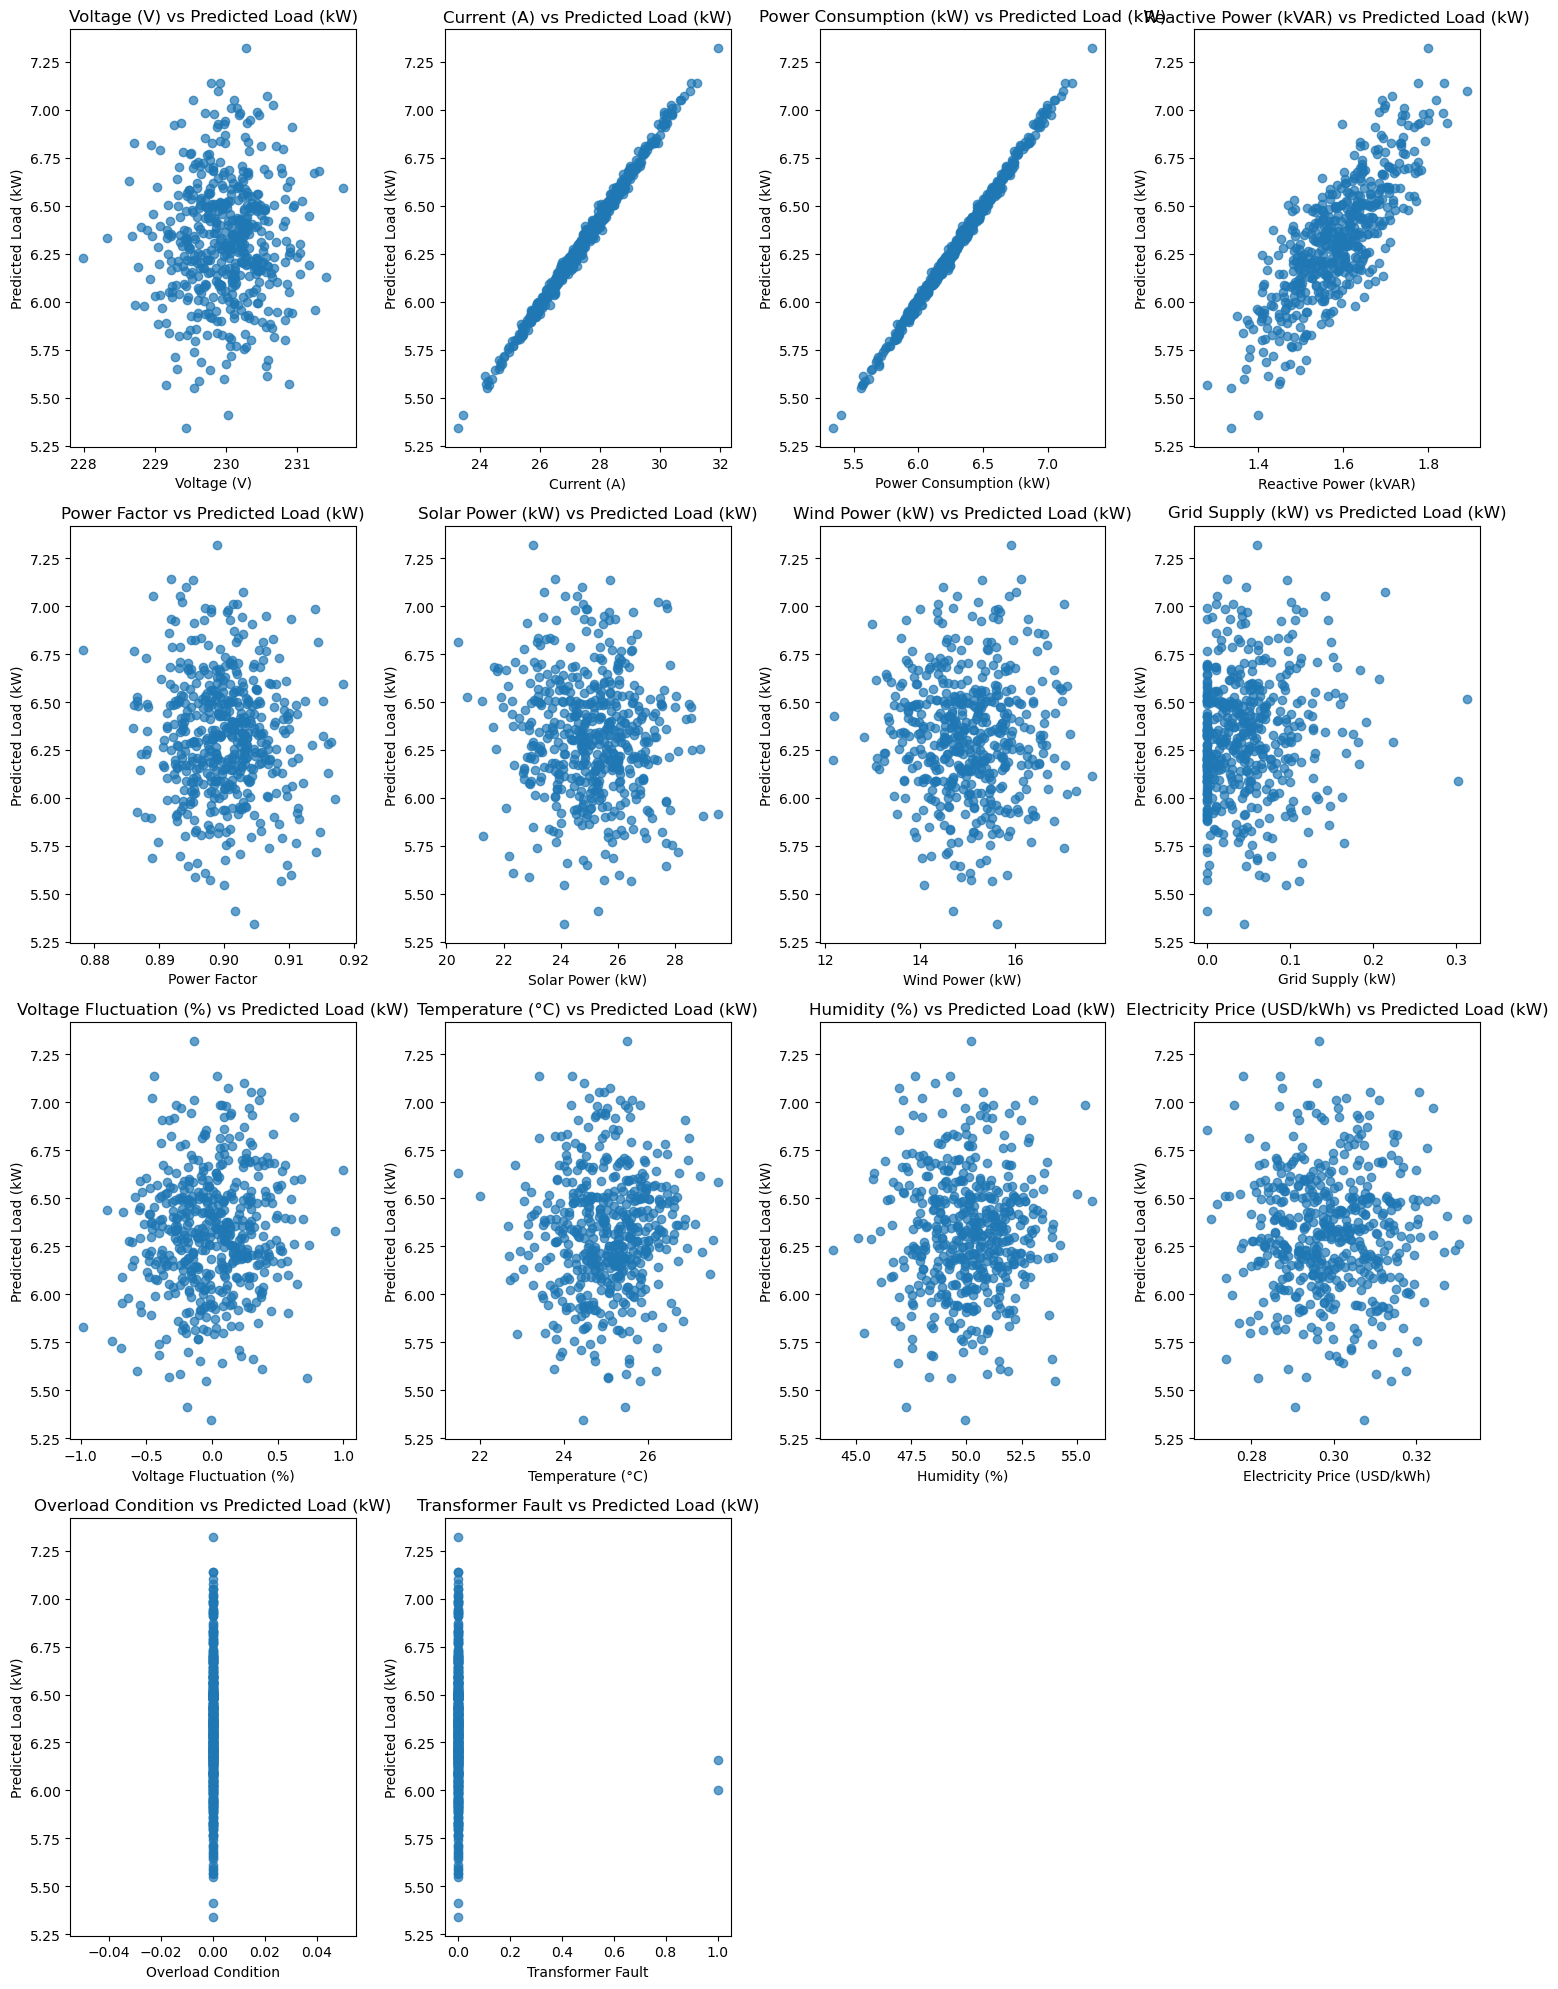

In [38]:
import matplotlib.pyplot as plt

# Exclude timestamp and predicted column
x_cols = [col for col in df_actual.columns if col not in ['Timestamp', 'Predicted Load (kW)']]

# Determine subplot grid size automatically
n_cols = 4  # number of plots per row
n_rows = (len(x_cols) + n_cols - 1) // n_cols  # ceiling division

# Create figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # flatten to make indexing easy

# Plot each feature vs predicted
for i, col in enumerate(x_cols):
    axes[i].scatter(df_actual[col], df_actual['Predicted Load (kW)'], alpha=0.7)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Predicted Load (kW)')
    axes[i].set_title(f'{col} vs Predicted Load (kW)')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [39]:
df_actual['Overload Condition'].value_counts()


Overload Condition
0    513
Name: count, dtype: int64

In [40]:
df_actual['Transformer Fault'].value_counts()


Transformer Fault
0    511
1      2
Name: count, dtype: int64

### It is better to skip these ordinal variable as it too muck skewed towards one value.

In [41]:
df_actual = df_actual.drop(['Overload Condition', 'Transformer Fault'], axis=1)

### Outlier detection using boxplot
### There is a presence of outliers on target variable

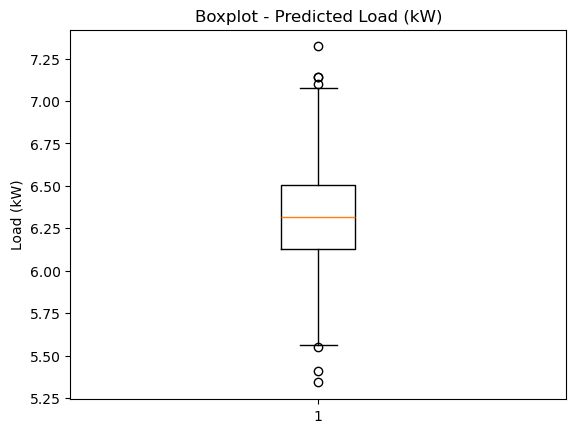

In [42]:

plt.boxplot(df_actual['Predicted Load (kW)'])
plt.title('Boxplot - Predicted Load (kW)')
plt.ylabel('Load (kW)')
plt.show()

In [43]:
corr = df_actual.corr()
corr

,Voltage (V),Current (A),Power Consumption (kW),Reactive Power (kVAR),Power Factor,Solar Power (kW),Wind Power (kW),Grid Supply (kW),Voltage Fluctuation (%),Temperature (°C),Humidity (%),Electricity Price (USD/kWh),Predicted Load (kW)
Voltage (V),1.000000,-0.010063,0.033969,0.081400,0.022350,0.057251,-0.000140,-0.042351,0.072054,0.030416,-0.028152,0.006677,0.032345
Current (A),-0.010063,1.000000,0.998816,0.790779,-0.070379,-0.099924,-0.017868,0.100513,0.094369,0.053801,0.004902,-0.026027,0.996766
Power Consumption (kW),0.033969,0.998816,1.000000,0.794924,-0.068639,-0.096109,-0.017446,0.097915,0.098356,0.055472,0.004106,-0.026305,0.997778
Reactive Power (kVAR),0.081400,0.790779,0.794924,1.000000,-0.001028,-0.083598,-0.035806,0.085129,0.029901,0.016255,0.004026,-0.082585,0.793904
Power Factor,0.022350,-0.070379,-0.068639,-0.001028,1.000000,-0.053710,0.004877,0.046442,-0.001249,0.013511,-0.030952,0.073148,-0.066797
Solar Power (kW),0.057251,-0.099924,-0.096109,-0.083598,-0.053710,1.000000,-0.038689,-0.118438,0.005012,-0.019799,0.031278,0.050085,-0.095123
Wind Power (kW),-0.000140,-0.017868,-0.017446,-0.035806,0.004877,-0.038689,1.000000,-0.182369,-0.004703,-0.045184,-0.035753,-0.049109,-0.015829
Grid Supply (kW),-0.042351,0.100513,0.097915,0.085129,0.046442,-0.118438,-0.182369,1.000000,-0.002055,-0.009193,-0.036254,0.010011,0.100673
Voltage Fluctuation (%),0.072054,0.094369,0.098356,0.029901,-0.001249,0.005012,-0.004703,-0.002055,1.000000,-0.005635,0.006751,0.020016,0.092779
Temperature (°C),0.030416,0.053801,0.055472,0.016255,0.013511,-0.019799,-0.045184,-0.009193,-0.005635,1.000000,-0.018626,-0.097744,0.053030


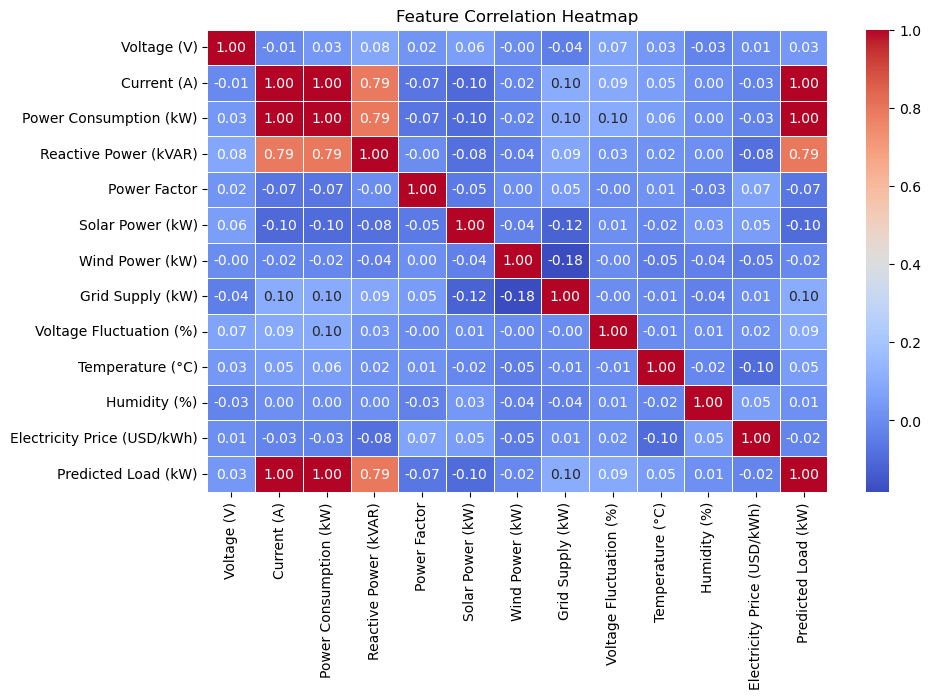

In [44]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


In [45]:
from scipy.stats import shapiro

# Select numeric columns
num_cols = df_actual.select_dtypes(include=['float64', 'int64']).columns

# Filter out ordinal/discrete columns based on unique values threshold
continuous_cols = [col for col in num_cols if df_actual[col].nunique() > 10]

results = []
for col in continuous_cols:
    stat, p = shapiro(df_actual[col].dropna())
    results.append({'Feature': col, 'Statistic': stat, 'p-value': p})

shapiro_df = pd.DataFrame(results)
print(shapiro_df)


                        Feature  Statistic       p-value
0                   Voltage (V)   0.996180  2.548024e-01
1                   Current (A)   0.997279  5.623851e-01
2        Power Consumption (kW)   0.997428  6.149854e-01
3         Reactive Power (kVAR)   0.998653  9.677894e-01
4                  Power Factor   0.994987  9.457326e-02
5              Solar Power (kW)   0.998141  8.586593e-01
6               Wind Power (kW)   0.997677  7.045731e-01
7              Grid Supply (kW)   0.862764  8.604586e-21
8       Voltage Fluctuation (%)   0.998927  9.917291e-01
9              Temperature (°C)   0.997043  4.830098e-01
10                 Humidity (%)   0.998527  9.489260e-01
11  Electricity Price (USD/kWh)   0.996244  2.680872e-01
12          Predicted Load (kW)   0.997239  5.485057e-01


### Sudden drop in last month expected as the last 6 days were removed to keep for inference

/var/folders/14/ljpzpqp91g1dpqy4sw00h0vm0000gn/T/ipykernel_49117/1619494678.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_consumption = df_actual['Power Consumption (kW)'].resample('M').sum()  # or .mean()


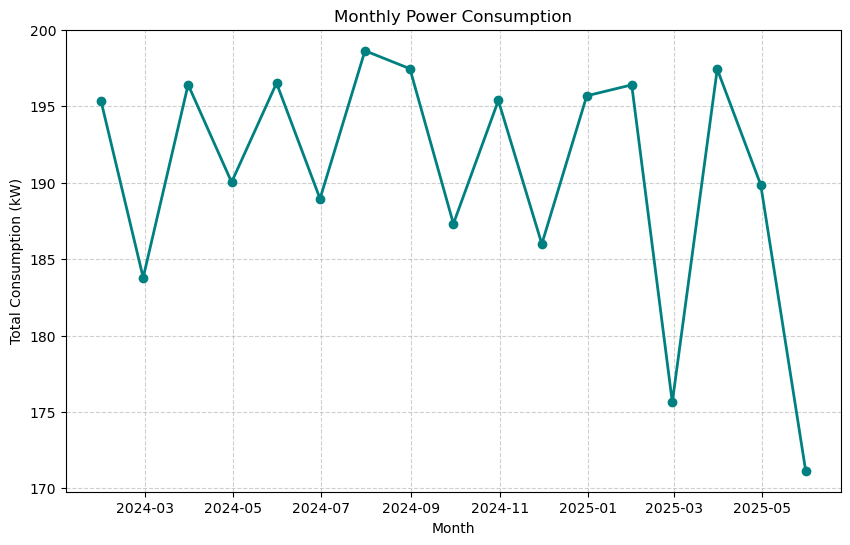

In [46]:
# Total consumption vs monthly
monthly_consumption = df_actual['Power Consumption (kW)'].resample('M').sum()  # or .mean()
plt.figure(figsize=(10, 6))
plt.plot(monthly_consumption.index, monthly_consumption.values, marker='o', linewidth=2, color='teal')
plt.title('Monthly Power Consumption')
plt.xlabel('Month')
plt.ylabel('Total Consumption (kW)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### The mean–median monthly consumption plot reveals how consistent or volatile your energy usage is over time.
### A large gap between mean and median indicates irregular consumptions or heavy demand

/var/folders/14/ljpzpqp91g1dpqy4sw00h0vm0000gn/T/ipykernel_49117/748381023.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mean = df_actual['Power Consumption (kW)'].resample('M').mean()
/var/folders/14/ljpzpqp91g1dpqy4sw00h0vm0000gn/T/ipykernel_49117/748381023.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_median = df_actual['Power Consumption (kW)'].resample('M').median()


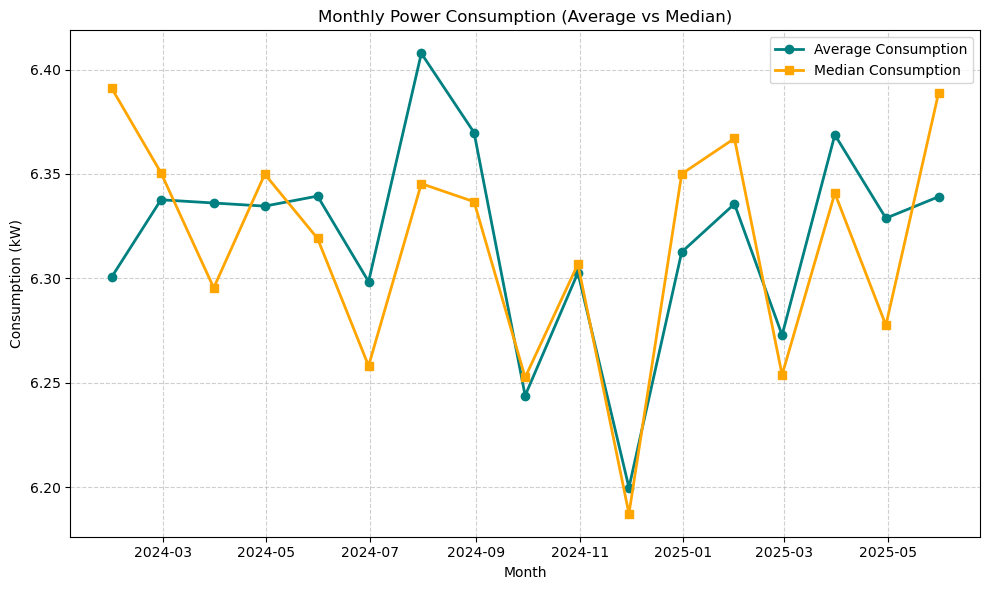

In [47]:

# Compute both mean and median per month
monthly_mean = df_actual['Power Consumption (kW)'].resample('M').mean()
monthly_median = df_actual['Power Consumption (kW)'].resample('M').median()

# Plot both on the same figure
plt.figure(figsize=(10, 6))

plt.plot(monthly_mean.index, monthly_mean.values, marker='o', linewidth=2, color='teal', label='Average Consumption')
plt.plot(monthly_median.index, monthly_median.values, marker='s', linewidth=2, color='orange', label='Median Consumption')

plt.title('Monthly Power Consumption (Average vs Median)')
plt.xlabel('Month')
plt.ylabel('Consumption (kW)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [48]:
df_actual.to_csv('../data/powerdata.csv')
df_inference.to_csv('../data/inferenceset.csv')

### Feature Engineering: Add calendar based features, lags(target and highly correlated ones) and leads (target)